# Import Library

In [1]:
#Import library yang dibutuhkan
import csv
import nltk
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemover, ArrayDictionary
import string
import langid

# Dataset

In [2]:
#Membuka file data tweets
df = pd.read_csv("sandwich_generation.csv")

# Data Pre-Processing

In [3]:
#menampilkan dataset
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1844954031401357753,Sat Oct 12 04:11:33 +0000 2024,1,Kaluna di film Home Sweet Loan mah bukan sandw...,1844954031401357753,NaN,NaN,in,NaN,0,2,0,https://x.com/slapsommelier/status/18449540314...,1105409737095434241,slapsommelier
1,1844953403782463901,Sat Oct 12 04:09:03 +0000 2024,0,Sandwich generation tuh hal yang benar apa ngg...,1844953403782463901,NaN,NaN,in,NaN,0,0,0,https://x.com/isahtangis/status/18449534037824...,1438171184760168448,isahtangis
2,1844940892744056854,Sat Oct 12 03:19:20 +0000 2024,0,uang 1 7 blm ada seminggu tinggal sisa 500 pdh...,1844940892744056854,NaN,NaN,in,NaN,0,0,0,https://x.com/hidupenuhliku/status/18449408927...,1156172604673183744,hidupenuhliku
3,1844905014227239235,Sat Oct 12 01:17:00 +0000 2024,0,@pakRW__ Banyak tagihan Sandwich generation,1844910106980516094,NaN,pakRW__,in,Indonesia,0,0,0,https://x.com/0xpickeri/status/184491010698051...,1779528747785535488,0xpickeri
4,1844883544180678762,Fri Oct 11 23:31:27 +0000 2024,5,Sebenarnya gk masalah harga tiketnya segitu. C...,1844883544180678762,NaN,NaN,in,ʚɞ｡.｡:+*동런*+:｡｡.｡:+*맠잼*+:｡.｡ʚɞ,0,6,0,https://x.com/liesprtzl/status/184488354418067...,983977387846258688,liesprtzl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3764,1717442231358124420,Thu Oct 26 11:12:03 +0000 2023,0,@jeblancha Udah tulang punggung sandwich gener...,1717499326791111079,NaN,jeblancha,in,NaN,0,0,0,https://x.com/jokovhic/status/1717499326791111079,771114987938951168,jokovhic
3765,1717479547145437548,Thu Oct 26 09:53:29 +0000 2023,0,4/5: Penting untuk Sandwich Generation memilik...,1717479553558528167,https://pbs.twimg.com/media/F9W2b9RaIAEcIE7.png,HDN_sol,in,🇮🇩,0,1,0,https://x.com/HDN_sol/status/1717479553558528167,97829764,HDN_sol
3766,1717479547145437548,Thu Oct 26 09:53:28 +0000 2023,0,3/5: Tantangan yang dihadapi oleh Sandwich Gen...,1717479551432056960,https://pbs.twimg.com/media/F9W2EmWbwAAo2pN.png,HDN_sol,in,🇮🇩,0,1,0,https://x.com/HDN_sol/status/1717479551432056960,97829764,HDN_sol
3767,1717479547145437548,Thu Oct 26 09:53:28 +0000 2023,0,2/5: Sandwich Generation adalah kelompok orang...,1717479549141942488,https://pbs.twimg.com/media/F9W12tqb0AEwNcN.png,HDN_sol,in,🇮🇩,0,1,0,https://x.com/HDN_sol/status/1717479549141942488,97829764,HDN_sol


In [4]:
#menghapus dataframe publishedAt authorDisplayName likeCount
df.drop(df.columns[[0,1,2,4,5,6,7,8,9,10,11,12,13,14]], axis=1, inplace=True)

display(df)

,full_text
0,Kaluna di film Home Sweet Loan mah bukan sandw...
1,Sandwich generation tuh hal yang benar apa ngg...
2,uang 1 7 blm ada seminggu tinggal sisa 500 pdh...
3,@pakRW__ Banyak tagihan Sandwich generation
4,Sebenarnya gk masalah harga tiketnya segitu. C...
...,...
3764,@jeblancha Udah tulang punggung sandwich gener...
3765,4/5: Penting untuk Sandwich Generation memilik...
3766,3/5: Tantangan yang dihadapi oleh Sandwich Gen...
3767,2/5: Sandwich Generation adalah kelompok orang...


In [5]:
df.drop_duplicates(subset ="full_text", keep = 'first', inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3763 entries, 0 to 3768
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  3763 non-null   object
dtypes: object(1)
memory usage: 58.8+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df

,full_text
0,Kaluna di film Home Sweet Loan mah bukan sandw...
1,Sandwich generation tuh hal yang benar apa ngg...
2,uang 1 7 blm ada seminggu tinggal sisa 500 pdh...
3,@pakRW__ Banyak tagihan Sandwich generation
4,Sebenarnya gk masalah harga tiketnya segitu. C...
...,...
3764,@jeblancha Udah tulang punggung sandwich gener...
3765,4/5: Penting untuk Sandwich Generation memilik...
3766,3/5: Tantangan yang dihadapi oleh Sandwich Gen...
3767,2/5: Sandwich Generation adalah kelompok orang...


# Case Folding

In [9]:
def case_folding(text):
    if isinstance(text, str):
        lowercase_text = text.lower()
        return lowercase_text
    else:
        return text

df['case_folding'] = df['full_text'].apply(case_folding)
df.head(50)

,full_text,case_folding
0,Kaluna di film Home Sweet Loan mah bukan sandw...,kaluna di film home sweet loan mah bukan sandw...
1,Sandwich generation tuh hal yang benar apa ngg...,sandwich generation tuh hal yang benar apa ngg...
2,uang 1 7 blm ada seminggu tinggal sisa 500 pdh...,uang 1 7 blm ada seminggu tinggal sisa 500 pdh...
3,@pakRW__ Banyak tagihan Sandwich generation,@pakrw__ banyak tagihan sandwich generation
4,Sebenarnya gk masalah harga tiketnya segitu. C...,sebenarnya gk masalah harga tiketnya segitu. c...
5,SEMOGA ALLAH LANCARKAN SELALU REJEKI SANDWICH ...,semoga allah lancarkan selalu rejeki sandwich ...
6,@tanyakanrl Dia mau berkembang &amp; gk stuck ...,@tanyakanrl dia mau berkembang &amp; gk stuck ...
7,Ayooo beli es krim yg bukan sandwich generatio...,ayooo beli es krim yg bukan sandwich generatio...
8,otw jadi sandwich generation,otw jadi sandwich generation
9,@txtdrimedia Siapa yg jadi sandwich generation...,@txtdrimedia siapa yg jadi sandwich generation...


# Cleaning

In [10]:
import pandas as pd
import re
import string

# Fungsi untuk membersihkan teks
def cleaningText(text):
    if isinstance(text, str):  # Memastikan input adalah string
        text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # remove mentions
        text = re.sub(r'#[A-Za-z0-9]+', '', text)  # remove hashtags
        text = re.sub(r'RT[\s]+', '', text)  # remove RT
        text = re.sub(r"http\S+", '', text)  # remove links
        text = re.sub(r'[^A-Za-z ]+', '', text)  # remove all non-alphabet characters

        text = text.replace('\n', ' ')  # replace new line into space
        text = text.translate(str.maketrans('', '', string.punctuation))  # remove all punctuations
        text = text.strip(' ')  # remove space from both sides
        text = re.sub(r'(?<=[.!?])\s*', ' ', text)
        text = re.sub(r'\b[A-Za-z]\b', '', text)
        return text
    else:
        return ''  # Kembali ke string kosong jika bukan string



# Terapkan fungsi cleaningText pada kolom 'case_folding'
df['cleaning'] = df['case_folding'].apply(cleaningText)

# Lihat hasilnya
df.head(50)


,full_text,case_folding,cleaning
0,Kaluna di film Home Sweet Loan mah bukan sandw...,kaluna di film home sweet loan mah bukan sandw...,kaluna di film home sweet loan mah bukan sandw...
1,Sandwich generation tuh hal yang benar apa ngg...,sandwich generation tuh hal yang benar apa ngg...,sandwich generation tuh hal yang benar apa ngg...
2,uang 1 7 blm ada seminggu tinggal sisa 500 pdh...,uang 1 7 blm ada seminggu tinggal sisa 500 pdh...,uang blm ada seminggu tinggal sisa pdhl ga ...
3,@pakRW__ Banyak tagihan Sandwich generation,@pakrw__ banyak tagihan sandwich generation,banyak tagihan sandwich generation
4,Sebenarnya gk masalah harga tiketnya segitu. C...,sebenarnya gk masalah harga tiketnya segitu. c...,sebenarnya gk masalah harga tiketnya segitu cu...
5,SEMOGA ALLAH LANCARKAN SELALU REJEKI SANDWICH ...,semoga allah lancarkan selalu rejeki sandwich ...,semoga allah lancarkan selalu rejeki sandwich ...
6,@tanyakanrl Dia mau berkembang &amp; gk stuck ...,@tanyakanrl dia mau berkembang &amp; gk stuck ...,dia mau berkembang amp gk stuck disitu aja dia...
7,Ayooo beli es krim yg bukan sandwich generatio...,ayooo beli es krim yg bukan sandwich generatio...,ayooo beli es krim yg bukan sandwich generatio...
8,otw jadi sandwich generation,otw jadi sandwich generation,otw jadi sandwich generation
9,@txtdrimedia Siapa yg jadi sandwich generation...,@txtdrimedia siapa yg jadi sandwich generation...,siapa yg jadi sandwich generation dan gajinya ...


# Tokenisasi

In [11]:
# Fungsi untuk tokenisasi
def tokenize(text):
    if isinstance(text, str):
        tokens = text.split()
        return tokens
    else:
        return []

df['tokenize'] = df['cleaning'].apply(tokenize)
df.head(50)

,full_text,case_folding,cleaning,tokenize
0,Kaluna di film Home Sweet Loan mah bukan sandw...,kaluna di film home sweet loan mah bukan sandw...,kaluna di film home sweet loan mah bukan sandw...,"[kaluna, di, film, home, sweet, loan, mah, buk..."
1,Sandwich generation tuh hal yang benar apa ngg...,sandwich generation tuh hal yang benar apa ngg...,sandwich generation tuh hal yang benar apa ngg...,"[sandwich, generation, tuh, hal, yang, benar, ..."
2,uang 1 7 blm ada seminggu tinggal sisa 500 pdh...,uang 1 7 blm ada seminggu tinggal sisa 500 pdh...,uang blm ada seminggu tinggal sisa pdhl ga ...,"[uang, blm, ada, seminggu, tinggal, sisa, pdhl..."
3,@pakRW__ Banyak tagihan Sandwich generation,@pakrw__ banyak tagihan sandwich generation,banyak tagihan sandwich generation,"[banyak, tagihan, sandwich, generation]"
4,Sebenarnya gk masalah harga tiketnya segitu. C...,sebenarnya gk masalah harga tiketnya segitu. c...,sebenarnya gk masalah harga tiketnya segitu cu...,"[sebenarnya, gk, masalah, harga, tiketnya, seg..."
5,SEMOGA ALLAH LANCARKAN SELALU REJEKI SANDWICH ...,semoga allah lancarkan selalu rejeki sandwich ...,semoga allah lancarkan selalu rejeki sandwich ...,"[semoga, allah, lancarkan, selalu, rejeki, san..."
6,@tanyakanrl Dia mau berkembang &amp; gk stuck ...,@tanyakanrl dia mau berkembang &amp; gk stuck ...,dia mau berkembang amp gk stuck disitu aja dia...,"[dia, mau, berkembang, amp, gk, stuck, disitu,..."
7,Ayooo beli es krim yg bukan sandwich generatio...,ayooo beli es krim yg bukan sandwich generatio...,ayooo beli es krim yg bukan sandwich generatio...,"[ayooo, beli, es, krim, yg, bukan, sandwich, g..."
8,otw jadi sandwich generation,otw jadi sandwich generation,otw jadi sandwich generation,"[otw, jadi, sandwich, generation]"
9,@txtdrimedia Siapa yg jadi sandwich generation...,@txtdrimedia siapa yg jadi sandwich generation...,siapa yg jadi sandwich generation dan gajinya ...,"[siapa, yg, jadi, sandwich, generation, dan, g..."


# Normalisasi

In [12]:
normalized_word = pd.read_csv("slang.csv",encoding='latin1')

normalized_word_dict = {}
for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 
        
def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

df['Normalisasi'] = df['tokenize'].apply(normalized_term)
df.head(50)

C:\Users\ekaad\AppData\Local\Temp\ipykernel_11328\3827775988.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalized_word_dict:
C:\Users\ekaad\AppData\Local\Temp\ipykernel_11328\3827775988.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalized_word_dict[row[0]] = row[1]


,full_text,case_folding,cleaning,tokenize,Normalisasi
0,Kaluna di film Home Sweet Loan mah bukan sandw...,kaluna di film home sweet loan mah bukan sandw...,kaluna di film home sweet loan mah bukan sandw...,"[kaluna, di, film, home, sweet, loan, mah, buk...","[kaluna, di, film, rumah, sweet, loan, mah, bu..."
1,Sandwich generation tuh hal yang benar apa ngg...,sandwich generation tuh hal yang benar apa ngg...,sandwich generation tuh hal yang benar apa ngg...,"[sandwich, generation, tuh, hal, yang, benar, ...","[sandwich, generation, itu, hal, yang, benar, ..."
2,uang 1 7 blm ada seminggu tinggal sisa 500 pdh...,uang 1 7 blm ada seminggu tinggal sisa 500 pdh...,uang blm ada seminggu tinggal sisa pdhl ga ...,"[uang, blm, ada, seminggu, tinggal, sisa, pdhl...","[uang, belum, ada, seminggu, tinggal, sisa, pa..."
3,@pakRW__ Banyak tagihan Sandwich generation,@pakrw__ banyak tagihan sandwich generation,banyak tagihan sandwich generation,"[banyak, tagihan, sandwich, generation]","[banyak, tagihan, sandwich, generation]"
4,Sebenarnya gk masalah harga tiketnya segitu. C...,sebenarnya gk masalah harga tiketnya segitu. c...,sebenarnya gk masalah harga tiketnya segitu cu...,"[sebenarnya, gk, masalah, harga, tiketnya, seg...","[sebenarnya, tidak, masalah, harga, tiketnya, ..."
5,SEMOGA ALLAH LANCARKAN SELALU REJEKI SANDWICH ...,semoga allah lancarkan selalu rejeki sandwich ...,semoga allah lancarkan selalu rejeki sandwich ...,"[semoga, allah, lancarkan, selalu, rejeki, san...","[semoga, allah, lancarkan, selalu, rezeki, san..."
6,@tanyakanrl Dia mau berkembang &amp; gk stuck ...,@tanyakanrl dia mau berkembang &amp; gk stuck ...,dia mau berkembang amp gk stuck disitu aja dia...,"[dia, mau, berkembang, amp, gk, stuck, disitu,...","[dia, mau, berkembang, amp, tidak, stuck, disi..."
7,Ayooo beli es krim yg bukan sandwich generatio...,ayooo beli es krim yg bukan sandwich generatio...,ayooo beli es krim yg bukan sandwich generatio...,"[ayooo, beli, es, krim, yg, bukan, sandwich, g...","[ayo, beli, es, krim, yang, bukan, sandwich, g..."
8,otw jadi sandwich generation,otw jadi sandwich generation,otw jadi sandwich generation,"[otw, jadi, sandwich, generation]","[otw, jadi, sandwich, generation]"
9,@txtdrimedia Siapa yg jadi sandwich generation...,@txtdrimedia siapa yg jadi sandwich generation...,siapa yg jadi sandwich generation dan gajinya ...,"[siapa, yg, jadi, sandwich, generation, dan, g...","[siapa, yang, jadi, sandwich, generation, dan,..."


# Stopwords Removal

In [14]:
from nltk.corpus import stopwords
stopword = stopwords.words('indonesian')
txt_stopword = pd.read_csv("kamus.csv", names=["stopwords"], header=None, encoding='latin1')

stopword.extend(["yaha","wut","wal", "pov","aaaaaa", "nya", "pke", "dehh", "wkwk", "dpt", "jg", "yg", "kl", "wkwkwkwkwkw",
                 "ia", "msih", "hehe", "hahaha", "haha", "kok", "nih", "langsumg", "lha", "ya", "sik", "lah",
                 "gaes", "guys", "nih", "knphehehehe", "gas", "amp", "ct", "sih", "aj","P","p","wkwkwk","quot","wk","hah","is",
                 "si","sih","loh","lho","akwkwk","ckckck","hahahaha","hihihihih","hih","Hih","ckckck","ckckc","kog","yth","nge",
                 "coy","i","rt", "utk","nan","&amp","hih", "deh", "nah","s","a","c","p","woy","bro","pret","gtgtgtgt" ])

stopword.extend(list(txt_stopword["stopwords"][0]))
stopword = set(stopword)

def stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

# Assuming you have a 'Normalisasi' column in your DataFrame
df['Stopwords'] = df['Normalisasi'].apply(stopwords)
df.head(50)

,full_text,case_folding,cleaning,tokenize,Normalisasi,Stopwords
0,Kaluna di film Home Sweet Loan mah bukan sandw...,kaluna di film home sweet loan mah bukan sandw...,kaluna di film home sweet loan mah bukan sandw...,"[kaluna, di, film, home, sweet, loan, mah, buk...","[kaluna, di, film, rumah, sweet, loan, mah, bu...","[kaluna, film, rumah, sweet, loan, mah, sandwi..."
1,Sandwich generation tuh hal yang benar apa ngg...,sandwich generation tuh hal yang benar apa ngg...,sandwich generation tuh hal yang benar apa ngg...,"[sandwich, generation, tuh, hal, yang, benar, ...","[sandwich, generation, itu, hal, yang, benar, ...","[sandwich, generation, salah]"
2,uang 1 7 blm ada seminggu tinggal sisa 500 pdh...,uang 1 7 blm ada seminggu tinggal sisa 500 pdh...,uang blm ada seminggu tinggal sisa pdhl ga ...,"[uang, blm, ada, seminggu, tinggal, sisa, pdhl...","[uang, belum, ada, seminggu, tinggal, sisa, pa...","[uang, seminggu, tinggal, sisa, nyicil, apk, a..."
3,@pakRW__ Banyak tagihan Sandwich generation,@pakrw__ banyak tagihan sandwich generation,banyak tagihan sandwich generation,"[banyak, tagihan, sandwich, generation]","[banyak, tagihan, sandwich, generation]","[tagihan, sandwich, generation]"
4,Sebenarnya gk masalah harga tiketnya segitu. C...,sebenarnya gk masalah harga tiketnya segitu. c...,sebenarnya gk masalah harga tiketnya segitu cu...,"[sebenarnya, gk, masalah, harga, tiketnya, seg...","[sebenarnya, tidak, masalah, harga, tiketnya, ...","[harga, tiketnya, segitu, rencananya, mengajak..."
5,SEMOGA ALLAH LANCARKAN SELALU REJEKI SANDWICH ...,semoga allah lancarkan selalu rejeki sandwich ...,semoga allah lancarkan selalu rejeki sandwich ...,"[semoga, allah, lancarkan, selalu, rejeki, san...","[semoga, allah, lancarkan, selalu, rezeki, san...","[semoga, allah, lancarkan, rezeki, sandwich, g..."
6,@tanyakanrl Dia mau berkembang &amp; gk stuck ...,@tanyakanrl dia mau berkembang &amp; gk stuck ...,dia mau berkembang amp gk stuck disitu aja dia...,"[dia, mau, berkembang, amp, gk, stuck, disitu,...","[dia, mau, berkembang, amp, tidak, stuck, disi...","[berkembang, stuck, disitu, dftr, kuliah, duku..."
7,Ayooo beli es krim yg bukan sandwich generatio...,ayooo beli es krim yg bukan sandwich generatio...,ayooo beli es krim yg bukan sandwich generatio...,"[ayooo, beli, es, krim, yg, bukan, sandwich, g...","[ayo, beli, es, krim, yang, bukan, sandwich, g...","[ayo, beli, es, krim, sandwich, generation, ba..."
8,otw jadi sandwich generation,otw jadi sandwich generation,otw jadi sandwich generation,"[otw, jadi, sandwich, generation]","[otw, jadi, sandwich, generation]","[otw, sandwich, generation]"
9,@txtdrimedia Siapa yg jadi sandwich generation...,@txtdrimedia siapa yg jadi sandwich generation...,siapa yg jadi sandwich generation dan gajinya ...,"[siapa, yg, jadi, sandwich, generation, dan, g...","[siapa, yang, jadi, sandwich, generation, dan,...","[sandwich, generation, gajinya, juta, andai, n..."


# Stemming

In [15]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [16]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['Stemming'] = df['Stopwords'].apply(lambda x: ' '.join(stem_text(x)))

df.head(5)

,full_text,case_folding,cleaning,tokenize,Normalisasi,Stopwords,Stemming
0,Kaluna di film Home Sweet Loan mah bukan sandw...,kaluna di film home sweet loan mah bukan sandw...,kaluna di film home sweet loan mah bukan sandw...,"[kaluna, di, film, home, sweet, loan, mah, buk...","[kaluna, di, film, rumah, sweet, loan, mah, bu...","[kaluna, film, rumah, sweet, loan, mah, sandwi...",kaluna film rumah sweet loan mah sandwich gene...
1,Sandwich generation tuh hal yang benar apa ngg...,sandwich generation tuh hal yang benar apa ngg...,sandwich generation tuh hal yang benar apa ngg...,"[sandwich, generation, tuh, hal, yang, benar, ...","[sandwich, generation, itu, hal, yang, benar, ...","[sandwich, generation, salah]",sandwich generation salah
2,uang 1 7 blm ada seminggu tinggal sisa 500 pdh...,uang 1 7 blm ada seminggu tinggal sisa 500 pdh...,uang blm ada seminggu tinggal sisa pdhl ga ...,"[uang, blm, ada, seminggu, tinggal, sisa, pdhl...","[uang, belum, ada, seminggu, tinggal, sisa, pa...","[uang, seminggu, tinggal, sisa, nyicil, apk, a...",uang minggu tinggal sisa nyicil apk apa iya al...
3,@pakRW__ Banyak tagihan Sandwich generation,@pakrw__ banyak tagihan sandwich generation,banyak tagihan sandwich generation,"[banyak, tagihan, sandwich, generation]","[banyak, tagihan, sandwich, generation]","[tagihan, sandwich, generation]",tagih sandwich generation
4,Sebenarnya gk masalah harga tiketnya segitu. C...,sebenarnya gk masalah harga tiketnya segitu. c...,sebenarnya gk masalah harga tiketnya segitu cu...,"[sebenarnya, gk, masalah, harga, tiketnya, seg...","[sebenarnya, tidak, masalah, harga, tiketnya, ...","[harga, tiketnya, segitu, rencananya, mengajak...",harga tiket segitu rencana ajak teman otomatis...


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3763 entries, 0 to 3768
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   full_text     3763 non-null   object
 1   case_folding  3763 non-null   object
 2   cleaning      3763 non-null   object
 3   tokenize      3763 non-null   object
 4   Normalisasi   3763 non-null   object
 5   Stopwords     3763 non-null   object
 6   Stemming      3763 non-null   object
dtypes: object(7)
memory usage: 235.2+ KB


In [18]:
# Menghapus baris yang mengandung nilai kosong
df_cleaned = df.dropna()

In [19]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3763 entries, 0 to 3768
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   full_text     3763 non-null   object
 1   case_folding  3763 non-null   object
 2   cleaning      3763 non-null   object
 3   tokenize      3763 non-null   object
 4   Normalisasi   3763 non-null   object
 5   Stopwords     3763 non-null   object
 6   Stemming      3763 non-null   object
dtypes: object(7)
memory usage: 235.2+ KB


In [20]:
df.head(20)

,full_text,case_folding,cleaning,tokenize,Normalisasi,Stopwords,Stemming
0,Kaluna di film Home Sweet Loan mah bukan sandw...,kaluna di film home sweet loan mah bukan sandw...,kaluna di film home sweet loan mah bukan sandw...,"[kaluna, di, film, home, sweet, loan, mah, buk...","[kaluna, di, film, rumah, sweet, loan, mah, bu...","[kaluna, film, rumah, sweet, loan, mah, sandwi...",kaluna film rumah sweet loan mah sandwich gene...
1,Sandwich generation tuh hal yang benar apa ngg...,sandwich generation tuh hal yang benar apa ngg...,sandwich generation tuh hal yang benar apa ngg...,"[sandwich, generation, tuh, hal, yang, benar, ...","[sandwich, generation, itu, hal, yang, benar, ...","[sandwich, generation, salah]",sandwich generation salah
2,uang 1 7 blm ada seminggu tinggal sisa 500 pdh...,uang 1 7 blm ada seminggu tinggal sisa 500 pdh...,uang blm ada seminggu tinggal sisa pdhl ga ...,"[uang, blm, ada, seminggu, tinggal, sisa, pdhl...","[uang, belum, ada, seminggu, tinggal, sisa, pa...","[uang, seminggu, tinggal, sisa, nyicil, apk, a...",uang minggu tinggal sisa nyicil apk apa iya al...
3,@pakRW__ Banyak tagihan Sandwich generation,@pakrw__ banyak tagihan sandwich generation,banyak tagihan sandwich generation,"[banyak, tagihan, sandwich, generation]","[banyak, tagihan, sandwich, generation]","[tagihan, sandwich, generation]",tagih sandwich generation
4,Sebenarnya gk masalah harga tiketnya segitu. C...,sebenarnya gk masalah harga tiketnya segitu. c...,sebenarnya gk masalah harga tiketnya segitu cu...,"[sebenarnya, gk, masalah, harga, tiketnya, seg...","[sebenarnya, tidak, masalah, harga, tiketnya, ...","[harga, tiketnya, segitu, rencananya, mengajak...",harga tiket segitu rencana ajak teman otomatis...
5,SEMOGA ALLAH LANCARKAN SELALU REJEKI SANDWICH ...,semoga allah lancarkan selalu rejeki sandwich ...,semoga allah lancarkan selalu rejeki sandwich ...,"[semoga, allah, lancarkan, selalu, rejeki, san...","[semoga, allah, lancarkan, selalu, rezeki, san...","[semoga, allah, lancarkan, rezeki, sandwich, g...",moga allah lancar rezeki sandwich generation a...
6,@tanyakanrl Dia mau berkembang &amp; gk stuck ...,@tanyakanrl dia mau berkembang &amp; gk stuck ...,dia mau berkembang amp gk stuck disitu aja dia...,"[dia, mau, berkembang, amp, gk, stuck, disitu,...","[dia, mau, berkembang, amp, tidak, stuck, disi...","[berkembang, stuck, disitu, dftr, kuliah, duku...",kembang stuck situ dftr kuliah dukung improve ...
7,Ayooo beli es krim yg bukan sandwich generatio...,ayooo beli es krim yg bukan sandwich generatio...,ayooo beli es krim yg bukan sandwich generatio...,"[ayooo, beli, es, krim, yg, bukan, sandwich, g...","[ayo, beli, es, krim, yang, bukan, sandwich, g...","[ayo, beli, es, krim, sandwich, generation, ba...",ayo beli es krim sandwich generation bayar
8,otw jadi sandwich generation,otw jadi sandwich generation,otw jadi sandwich generation,"[otw, jadi, sandwich, generation]","[otw, jadi, sandwich, generation]","[otw, sandwich, generation]",otw sandwich generation
9,@txtdrimedia Siapa yg jadi sandwich generation...,@txtdrimedia siapa yg jadi sandwich generation...,siapa yg jadi sandwich generation dan gajinya ...,"[siapa, yg, jadi, sandwich, generation, dan, g...","[siapa, yang, jadi, sandwich, generation, dan,...","[sandwich, generation, gajinya, juta, andai, n...",sandwich generation gaji juta andai ngeluh


In [21]:
df_cleaned.to_csv('Hasil_Preprocessing_Data_Sandiwch_Generation.csv',encoding='utf8', index=False)

In [22]:
df=df[df['Stopwords'].map(len) >=5]
df=df[df['Stopwords'].map(len) <=30]

In [23]:
df = df[['Stemming']]
df.head(10)

,Stemming
0,kaluna film rumah sweet loan mah sandwich gene...
2,uang minggu tinggal sisa nyicil apk apa iya al...
4,harga tiket segitu rencana ajak teman otomatis...
5,moga allah lancar rezeki sandwich generation a...
6,kembang stuck situ dftr kuliah dukung improve ...
7,ayo beli es krim sandwich generation bayar
9,sandwich generation gaji juta andai ngeluh
10,posisi sandwich generation orang tua bebanin k...
11,alas suka hidup sandwich generation hutang ora...
12,percaya sidin sandwich generation jua sadar sa...


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3109 entries, 0 to 3768
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Stemming  3109 non-null   object
dtypes: object(1)
memory usage: 48.6+ KB


In [25]:
df.to_csv("DataCleaned_SandwichGenerations.csv",sep=";")

In [26]:
df = df[df['Stemming'].apply(lambda tokens: len(tokens) > 0)]

In [27]:
df.head(50)

,Stemming
0,kaluna film rumah sweet loan mah sandwich gene...
2,uang minggu tinggal sisa nyicil apk apa iya al...
4,harga tiket segitu rencana ajak teman otomatis...
5,moga allah lancar rezeki sandwich generation a...
6,kembang stuck situ dftr kuliah dukung improve ...
7,ayo beli es krim sandwich generation bayar
9,sandwich generation gaji juta andai ngeluh
10,posisi sandwich generation orang tua bebanin k...
11,alas suka hidup sandwich generation hutang ora...
12,percaya sidin sandwich generation jua sadar sa...


In [28]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, RobertaModel, AdamW
from transformers import pipeline

roberta_classifier = pipeline('sentiment-analysis', model="w11wo/indonesian-roberta-base-sentiment-classifier",tokenizer="w11wo/indonesian-roberta-base-sentiment-classifier")
df['label'] = df['Stemming'].apply(lambda x: roberta_classifier(x[:512])[0]['label'])  # Truncate to 512 tokens

C:\Users\ekaad\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [29]:
df['label'] = df['label'].astype('category')
label_mapping = dict(enumerate(df['label'].cat.categories))

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3109 entries, 0 to 3768
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Stemming  3109 non-null   object  
 1   label     3109 non-null   category
dtypes: category(1), object(1)
memory usage: 51.7+ KB


In [31]:
df.head(20)

,Stemming,label
0,kaluna film rumah sweet loan mah sandwich gene...,neutral
2,uang minggu tinggal sisa nyicil apk apa iya al...,neutral
4,harga tiket segitu rencana ajak teman otomatis...,neutral
5,moga allah lancar rezeki sandwich generation a...,positive
6,kembang stuck situ dftr kuliah dukung improve ...,positive
7,ayo beli es krim sandwich generation bayar,neutral
9,sandwich generation gaji juta andai ngeluh,neutral
10,posisi sandwich generation orang tua bebanin k...,negative
11,alas suka hidup sandwich generation hutang ora...,negative
12,percaya sidin sandwich generation jua sadar sa...,positive


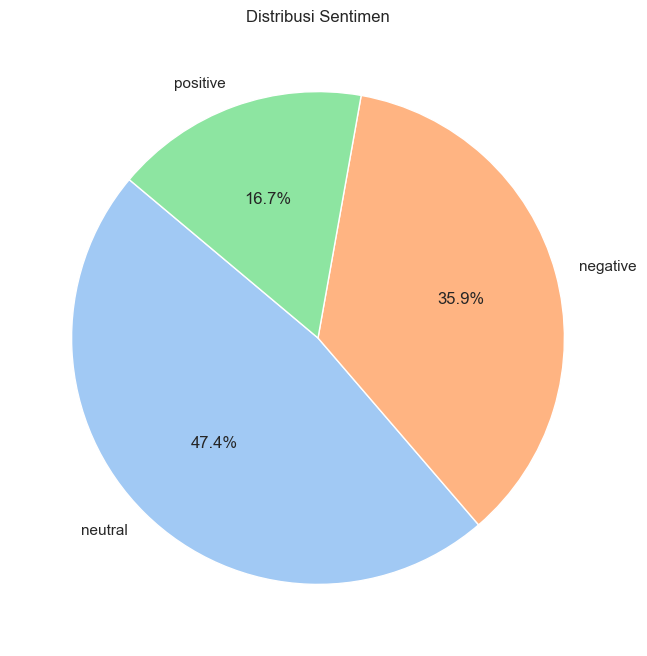

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
# Hitung jumlah masing-masing label
label_counts = df['label'].value_counts()

# Persiapkan data untuk pie chart
labels = label_counts.index
sizes = label_counts.values

# Atur gaya seaborn
sns.set()

# Buat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribusi Sentimen')
plt.show()

In [33]:
df['label'].value_counts()

label
neutral     1474
negative    1116
positive     519
Name: count, dtype: int64

In [35]:
# Simpan DataFrame ke dalam file CSV
df[['Stemming', 'label']].to_csv('DataLabeling_SandwichGenerations.csv', index=False)

In [37]:
df = pd.read_csv("DataLabeling_SandwichGenerations.csv")

In [38]:
df

,Stemming,label
0,kaluna film rumah sweet loan mah sandwich gene...,neutral
1,uang minggu tinggal sisa nyicil apk apa iya al...,neutral
2,harga tiket segitu rencana ajak teman otomatis...,neutral
3,moga allah lancar rezeki sandwich generation a...,positive
4,kembang stuck situ dftr kuliah dukung improve ...,positive
...,...,...
3104,gampang nabungnya tanggung susah sandwich gene...,negative
3105,sandwich generation milik dukung keluarga masy...,neutral
3106,tantang hadap sandwich generation berat bagi e...,negative
3107,sandwich generation kelompok orang jepit tangg...,neutral


In [39]:
df.drop_duplicates(subset ="Stemming", keep = 'first', inplace = True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3097 entries, 0 to 3108
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Stemming  3097 non-null   object
 1   label     3097 non-null   object
dtypes: object(2)
memory usage: 72.6+ KB


In [41]:
df.rename(columns = {'Stemming':'text'}, inplace = True)

In [42]:
df=df[['text','label']]

In [43]:
df

,text,label
0,kaluna film rumah sweet loan mah sandwich gene...,neutral
1,uang minggu tinggal sisa nyicil apk apa iya al...,neutral
2,harga tiket segitu rencana ajak teman otomatis...,neutral
3,moga allah lancar rezeki sandwich generation a...,positive
4,kembang stuck situ dftr kuliah dukung improve ...,positive
...,...,...
3104,gampang nabungnya tanggung susah sandwich gene...,negative
3105,sandwich generation milik dukung keluarga masy...,neutral
3106,tantang hadap sandwich generation berat bagi e...,negative
3107,sandwich generation kelompok orang jepit tangg...,neutral


In [44]:
df.to_csv("Final_dataset_SandwichGenerations.csv",sep=";")